In [1]:
from util import load_user_data, task_ID_list_to_check
import pandas as pd
import numpy as np

valid_users, tp_data = load_user_data(folder_name="../anonymized_data", reserved_users=None)
user2condition = tp_data['user2condition']
user_planning_actions = tp_data['user_planning_actions']
condition_count = {}
for user in valid_users:
    tp_condition = user2condition[user]
    if tp_condition not in condition_count:
        condition_count[tp_condition] = 0
    condition_count[tp_condition] += 1
print(condition_count)

248 complete the NASA-TLX
248 complete the whole study
{'AP-AE': 63, 'AP-UE': 64, 'UP-UE': 60, 'UP-AE': 61}


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
data_dict = {}
user_cognitive_load = tp_data['cognitive_load']
nasatlx_variable_names = ["mental_demand", "physical_demand", "temporal_demand", "performance", "effort", "frustration"]
name_map = {
    "mental_demand": "Mental\nDemand",
    "physical_demand": "Physical\nDemand",
    "temporal_demand": "Temporal\nDemand",
    "performance": "Performance",
    "effort": "Effort",
    "frustration": "Frustration",
}
data_dict["condition"] = []
user_order = []
for user in valid_users:
    data_dict["condition"].append(user2condition[user])
    if tp_condition.startswith("AP"):
        data_dict["planning"].append("automatic")
    else:
        data_dict["planning"].append("user-involved")
    if tp_condition.endswith("AE"):
        data_dict["execution"].append("automatic")
    else:
        data_dict["execution"].append("user-involved")
    user_order.append(user)
for variable in nasatlx_variable_names:
    tp_list = []
    for user in user_order:
        tp_list.append(user_cognitive_load[user][variable])
    data_dict[name_map[variable]] = tp_list
    print(variable, np.mean(tp_list))
# data = [loan_data_variables["Numeracy_level"], loan_data_variables["ATI"], loan_data_variables["TiA-Propensity to Trust"], loan_data_variables["TiA-Familiarity"], loan_data_variables["Analogy_domain_familiarity"]]
# data = [loan_data_variables["Numeracy_level"], loan_data_variables["ATI"], loan_data_variables["TiA-Propensity to Trust"], loan_data_variables["TiA-Familiarity"]]
# df = pd.DataFrame(data_dict, dtype=float)
# print(df.isnull().sum())
# print(df)
# sns.set_theme(style="whitegrid")
# ax = sns.boxplot(data=df)
# ax.tick_params(labelsize=13)
# plt.show()

KeyError: 'planning'

In [3]:
variable_dict = {
    "condition": [],
    "planning": [],
    "execution": []
}
user_cognitive_load = tp_data['cognitive_load']
all_conditions = ["AP-AE", "AP-UE", "UP-AE", "UP-UE"]
for dimension in nasatlx_variable_names:
    variable_dict[dimension] = []
condition_dict = {}
for condition in all_conditions:
    condition_dict[condition] = {}
    for dimension in nasatlx_variable_names:
        condition_dict[condition][dimension] = []
for user in valid_users:
    # all_user_data[user]["reliance"] = user_reliance
    tp_condition = user2condition[user]
    if tp_condition.startswith("AP"):
        variable_dict["planning"].append("automatic")
    else:
        variable_dict["planning"].append("user-involved")
    if tp_condition.endswith("AE"):
        variable_dict["execution"].append("automatic")
    else:
        variable_dict["execution"].append("user-involved")
    variable_dict["condition"].append(tp_condition)
    for dimension in nasatlx_variable_names:
        variable_dict[dimension].append(user_cognitive_load[user][dimension])
        if dimension in nasatlx_variable_names:
            condition_dict[tp_condition][dimension].append(user_cognitive_load[user][dimension])
for variable in variable_dict:
    print(variable, len(variable_dict[variable]))
df = pd.DataFrame(variable_dict)
print(df.shape)

condition 248
planning 248
execution 248
mental_demand 248
physical_demand 248
temporal_demand 248
performance 248
effort 248
frustration 248
(248, 9)


In [ ]:
data_dict["planning"] = []
data_dict["execution"] = []
condition_dict = {}
for user in user_order:
    tp_condition = user2condition[user]
    if tp_condition.startswith("AP"):
        data_dict["planning"].append("automatic")
    else:
        data_dict["planning"].append("user-involved")
    if tp_condition.endswith("AE"):
        data_dict["execution"].append("automatic")
    else:
        data_dict["execution"].append("user-involved")
    if tp_condition not in condition_dict:
        condition_dict[tp_condition] = {}
        for dimension in nasatlx_variable_names:
            condition_dict[tp_condition][dimension] = []
    for dimension in nasatlx_variable_names:
        condition_dict[tp_condition][dimension].append(user_cognitive_load[user][dimension])
df = pd.DataFrame(data_dict)


In [ ]:
print("-" * 34)
from pingouin import ancova, anova
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print("For all participants, compare with experimental conditions")
for dimension in nasatlx_variable_names:
    print(dimension)
    aov = anova(dv=dimension, between='condition', data=df, effsize='n2')
    # aov = ancova(dv=dimension, covar=covariates, between='condition', data=df, effsize='n2')
    print(aov.round(3))
    alpha = 0.05 / 4
    if aov.to_dict()['p-unc'][0] <= alpha:
        tukey = pairwise_tukeyhsd(endog=df[dimension], groups=df['condition'], alpha=alpha)
        print(tukey)
    for condition in all_conditions:
        print(condition, np.mean(condition_dict[condition][dimension]))
    print("-" * 17)

In [5]:
from pingouin import ancova, anova
from statsmodels.stats.multicomp import pairwise_tukeyhsd
for dimension in nasatlx_variable_names:
    print(dimension)
    aov = anova(dv=dimension, between=['planning', 'execution'], data=df, effsize='n2')
    # aov = ancova(dv=dimension, covar=["Propensity to Trust", "Familiarity", "llm_expertise", "assistant_expertise"], between=['planning', 'execution'], data=df, effsize='n2')
    print(aov.round(3))
    if aov.to_dict()['p-unc'][0] <= 0.05 / 4:
        tukey = pairwise_tukeyhsd(endog=df[dimension], groups=df['condition'], alpha=0.0125)
        print(tukey)
    if aov.to_dict()['p-unc'][1] <= 0.05 / 4:
        tukey = pairwise_tukeyhsd(endog=df[dimension], groups=df['condition'], alpha=0.0125)
        print(tukey)
    if aov.to_dict()['p-unc'][2] <= 0.05 / 4:
        tukey = pairwise_tukeyhsd(endog=df[dimension], groups=df['condition'], alpha=0.0125)
        print(tukey)
    for condition in ["AP-AE", "AP-UE", "UP-AE", "UP-UE"]:
        print(condition, np.mean(condition_dict[condition][dimension]))
    print("-" * 17)

mental_demand
                 Source        SS     DF      MS      F  p-unc     n2
0              planning    69.277    1.0  69.277  7.186  0.008  0.028
1             execution    33.431    1.0  33.431  3.468  0.064  0.014
2  planning * execution     0.011    1.0   0.011  0.001  0.973  0.000
3              Residual  2352.293  244.0   9.641    NaN    NaN    NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.01
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 AP-AE  AP-UE   0.7212 0.5582 -0.9728 2.4153  False
 AP-AE  UP-AE    1.044 0.2429 -0.6706 2.7586  False
 AP-AE  UP-UE   1.7921 0.0084  0.0702 3.5139   True
 AP-UE  UP-AE   0.3227 0.9378 -1.3852 2.0307  False
 AP-UE  UP-UE   1.0708 0.2227 -0.6444 2.7861  False
 UP-AE  UP-UE   0.7481 0.5478 -0.9875 2.4836  False
---------------------------------------------------
AP-AE 2.8412698412698414
AP-UE 3.5625
UP-AE 3.8852459016393444
UP-UE 4.633333333333334
-----------------
physical_de

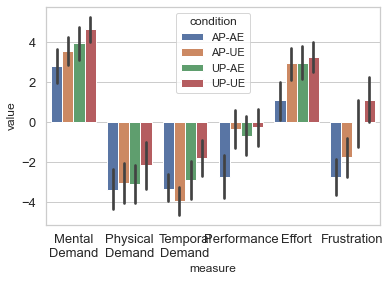

In [14]:
data_long_format = {
    "condition": [],
    "measure": [],
    "value": []
}
for user in valid_users:
    for variable in nasatlx_variable_names:
        data_long_format["condition"].append(user2condition[user])
        data_long_format["measure"].append(name_map[variable])
        data_long_format["value"].append(user_cognitive_load[user][variable])
# data = [loan_data_variables["Numeracy_level"], loan_data_variables["ATI"], loan_data_variables["TiA-Propensity to Trust"], loan_data_variables["TiA-Familiarity"], loan_data_variables["Analogy_domain_familiarity"]]
# data = [loan_data_variables["Numeracy_level"], loan_data_variables["ATI"], loan_data_variables["TiA-Propensity to Trust"], loan_data_variables["TiA-Familiarity"]]
df = pd.DataFrame(data_long_format, dtype=float)
# print(df.isnull().sum())
# print(df)
sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")
# print(type(tips))
# print(df)
# print(type(df))
# print(len(data[0]), len(data[1]), len(data[2]), len(data[3]))
ax = sns.barplot(data=df, x="measure", y="value", hue="condition", hue_order=['AP-AE', 'AP-UE', 'UP-AE', 'UP-UE'])
ax.tick_params(labelsize=13)
plt.show()